In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

In [2]:
# Visualizing Decison Trees

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = load_iris()
x = data.data
y = data.target

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

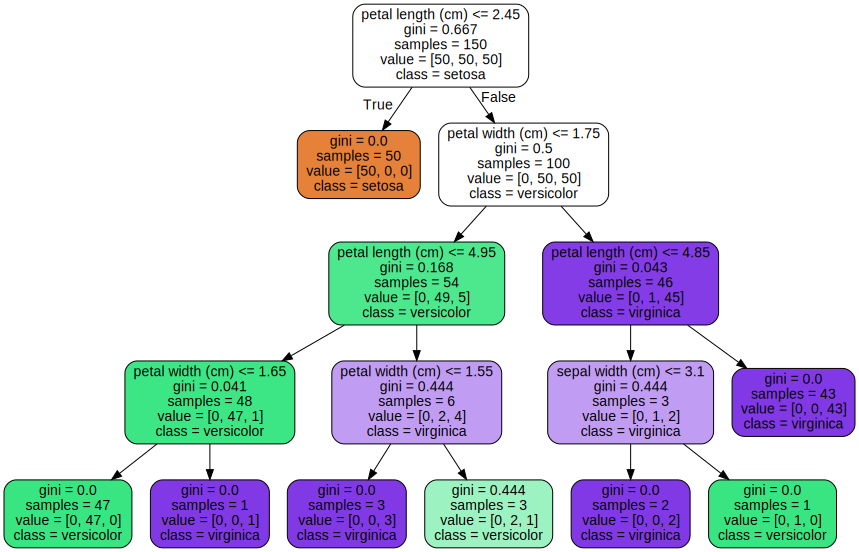

In [13]:
from graphviz import Source

export_graphviz(dt, out_file="tree.dot", rounded=True, filled=True, 
                feature_names=data.feature_names, class_names=data.target_names)

Source.from_file("tree.dot")

In [17]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(x[:, 2:], y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [57]:
# Decision Boundary plotting function for plotting 2 features
from matplotlib import cm

def plot_decision_boundary(clf, x, y, axes=[0, 7.5, 0, 3], iris=True, plot_training=True, legend=False):
  x1_m = np.linspace(axes[0], axes[1])
  x2_m = np.linspace(axes[2], axes[3])
  x1, x2 = np.meshgrid(x1_m, x2_m)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  # Forms decison boundaries
  plt.contourf(x1, x2, y_pred, alpha=0.7, cmap=cm.get_cmap('Dark2'))
  # Plotting te data points, if data point is not available no error is thrown
  if plot_training:
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "ro")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
    plt.plot(x[:, 0][y==2], x[:, 1][y==2], "g^")
  if iris:
      plt.xlabel("Petal length", fontsize=14)
      plt.ylabel("Petal width", fontsize=14)
  else:
      plt.xlabel(r"$x_1$", fontsize=18)
      plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

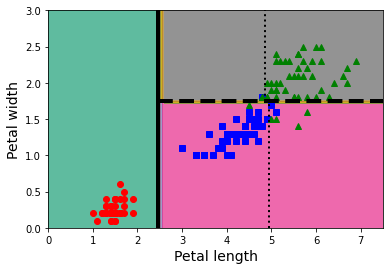

In [59]:
plot_decision_boundary(dt, x[:, 2:], y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=4)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=4)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

## Regression Trees Plotting

In [83]:
# Generating random data
m = 200
x = np.random.rand(m, 1)
y = 4 * (x - 0.5)**2 + np.random.randn(m, 1)/10

In [62]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=2, random_state=42)
dt.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

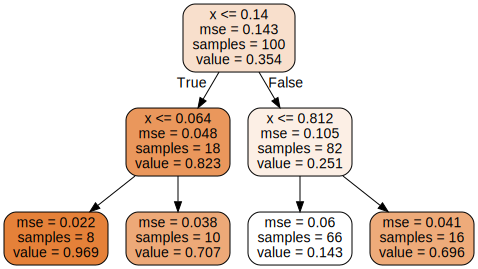

In [63]:
export_graphviz(dt, "reg_tree.dot", feature_names=["x"], rounded=True, filled=True)
Source.from_file("reg_tree.dot")

In [84]:
# Plotting Regression Tree

def plot_regression_tree(dt, x, y, axes=[0, 1, -0.2, 1]):
  x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
  y_pred = dt.predict(x1)
  plt.axis(axes)
  plt.plot(x1, y_pred, "r-", linewidth=2)
  plt.plot(x, y, "b.")
  plt.xlabel("$x$")
  plt.ylabel("$y$")

Text(0.01, 0.2, 'Depth=1')

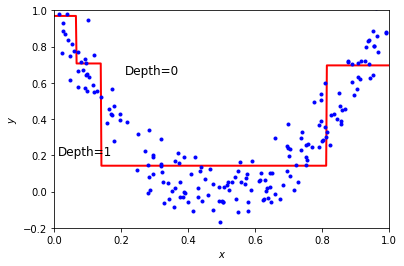

In [89]:
plot_regression_tree(dt, x, y)
plt.text(0.21, 0.65, "Depth=0", fontsize=12)
plt.text(0.01, 0.2, "Depth=1", fontsize=12)